In [ ]:
#!pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 20.8 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=5624e3dc1619fc5b416ede635c56d2717bdaa4a69734192ee95d7a16ea862e4a
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions

# The antecedents define the consequent
mean_delay = ctrl.Antecedent(np.arange(0, 1.1, 0.05), 'Mean delay')
no_servers = ctrl.Antecedent(np.arange(0, 1.1, 0.05), 'Number of servers')
utilisation_factor = ctrl.Antecedent(np.arange(0, 1.1, 0.05), 'Repair utilisation')

# The consequents are defined based on the antecendent
no_spares = ctrl.Consequent(np.arange(0, 1.1, 0.05), 'Number of spares')

# Custom membership functions can be built interactively with a familiar,
# Pythonic API

#trapmf - trapezoid shaped membership function 
#trimf - Triangle shaped membership function

# Average Waiting time
mean_delay['Very Short'] = fuzz.trapmf(mean_delay.universe, [0, 0, 0.1, 0.3])
mean_delay['Short'] = fuzz.trimf(mean_delay.universe, [0.1, 0.3, 0.5])
mean_delay['Medium'] = fuzz.trapmf(mean_delay.universe, [0.4, 0.6, 0.65, 0.7])

# Number of servers
no_servers['Small'] = fuzz.trapmf(no_servers.universe, [0, 0, 0.2, 0.35])
no_servers['Medium'] = fuzz.trimf(no_servers.universe, [0.3, 0.5, 0.7])
no_servers['Large'] = fuzz.trapmf(no_servers.universe, [0.6, 0.8, 1, 1])

# How much repair is needed
utilisation_factor['Low'] = fuzz.trapmf(utilisation_factor.universe, [0, 0, 0.4, 0.6])
utilisation_factor['Medium'] = fuzz.trimf(utilisation_factor.universe, [0.4, 0.6, 0.8])
utilisation_factor['High'] = fuzz.trapmf(utilisation_factor.universe, [0.6, 0.8, 1, 1])

# Number of spare parts required to run the business
no_spares['Very Small'] = fuzz.trapmf(no_spares.universe, [0, 0, 0.1, 0.3])
no_spares['Small'] = fuzz.trimf(no_spares.universe, [0, 0.2, 0.4])
no_spares['Rather Small'] = fuzz.trimf(no_spares.universe, [0.25, 0.35, 0.45])
no_spares['Medium'] = fuzz.trimf(no_spares.universe, [0.3, 0.5, 0.7])
no_spares['Rather Large'] = fuzz.trimf(no_spares.universe, [0.55, 0.65, 0.75])
no_spares['Large'] = fuzz.trimf(no_spares.universe, [0.6, 0.8, 1])
no_spares['Very Large'] = fuzz.trapmf(no_spares.universe, [0.7, 0.9, 1, 1])


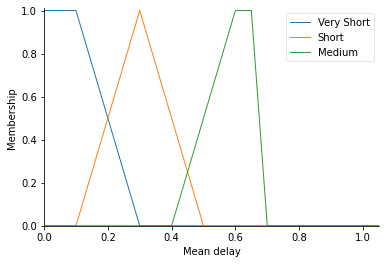

In [ ]:
mean_delay.view()

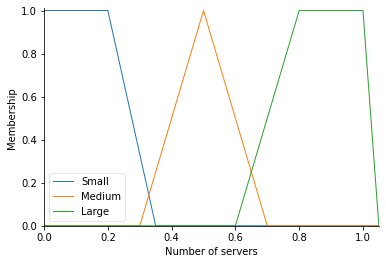

In [ ]:
no_servers.view()

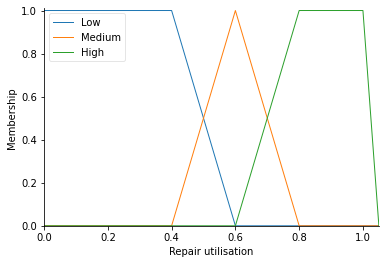

In [ ]:
utilisation_factor.view()

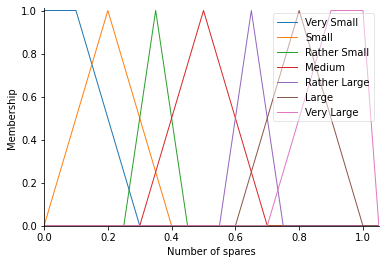

In [ ]:
no_spares.view()

In [ ]:
# This contains the rules which lead to consequent no_spares['Small']
rule0 = ctrl.Rule(antecedent=((utilisation_factor['Low']) |
                              (mean_delay['Medium'] & no_servers['Medium']) |
                               (mean_delay['Short'] & no_servers['Large'])),
                               consequent=no_spares['Small'])

# This contains the rules which lead to consequent no_spares['Medium']
rule1 = ctrl.Rule(antecedent=((utilisation_factor['Medium']) |
                              (mean_delay['Medium'] & no_servers['Small']) |
                               (mean_delay['Very Short'] & no_servers['Large'])),
                               consequent=no_spares['Medium'])

# This contains the rules which lead to consequent no_spares['Large']
rule2 = ctrl.Rule(antecedent=((utilisation_factor['High']) |
                              (mean_delay['Short'] & no_servers['Small'])), 
                              consequent=no_spares['Large'])

# This is the rule which lead to consequent no_spares['Very Large']
rule3 = ctrl.Rule(mean_delay['Very Short'] & no_servers['Small'], no_spares['Very Large'])

# This is the rule which lead to consequent no_spares['Rather Large']
rule4 = ctrl.Rule(mean_delay['Very Short'] & no_servers['Medium'], no_spares['Rather Large'])

# This is the rule which lead to consequent no_spares['Rather Small']
rule5 = ctrl.Rule(mean_delay['Short'] & no_servers['Medium'], no_spares['Rather Small'])

# This is the rule which lead to consequent no_spares['Very Small']
rule6 = ctrl.Rule(mean_delay['Medium'] & no_servers['Large'], no_spares['Very Small'])

#rule1.view()

In [ ]:
# Create the control system
spare_ctrl = ctrl.ControlSystem(rules = [rule0, rule1, rule2, rule3, rule4, rule5, rule6])

In [ ]:
# Create the simulator of the control system, allows to test it
spare = ctrl.ControlSystemSimulation(spare_ctrl)

In [ ]:
# Specify the inputs to simulate the system
spare.input['Mean delay'] = 0.6
spare.input['Number of servers'] = 0.2
spare.input['Repair utilisation'] = 0.2

# Crunch the numbers
spare.compute()

0.3500000000000001


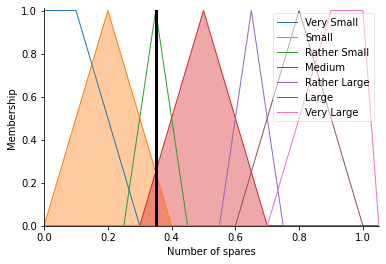

In [ ]:
# Results
print(spare.output['Number of spares'])
no_spares.view(sim=spare)